# EfficientNet: Rethinking Model Scaling for Convolutional Neural Networks

선행해야 할 논문 :  ResNet > MobileNet > SENet</br>
-> 이유 MobileNet과 SENet에서 사용된 개념이 Efficient Net에 적용됨

##초록 : 효율적인 모델의 구축을 위해 **Depth, Width, Resolution**을 스케일링 하는 방법을 제안
</br> MnasNet에서 사용하는 Conv구조인 MBConv를 이용하여 EffectientNet를 제안함

## Introduction
기존 연구의 한계점 : 이전 연구에서 모델의 성능을 높이는 방안들은 depth, width, image_size 중 하나만 scalling만 수행하는식으로 진행

논문의 제안 : depth, width, image size이 3가지 변수에 대한 관계를 수식화 -> 상황에 맞춘 효율적인 Compound scaling을 제안

<div style="display: flex; align-items: flex-start;">
    <div style="flex: 1;">
        <img src="./img/01.webp" alt="image" style="max-width: 100%; height: auto;">
    </div>
    <div style="flex: 1; padding-left: 10px;">
        이 논문에서는 Figure 1.을 통해 이전 모델들은 Parameters가 많을수록 정확도가 </br>올라가는 모습과 함께 EfficientNet은 더 적은 파라미터들로 </br>더 높은 정확도를 보인다는 것을 보여준다. </br>이것이 가능했던 이유는 본 논문에서 제시하는 </br>compound scaling의 역할이 크다.
    </div>
</div>

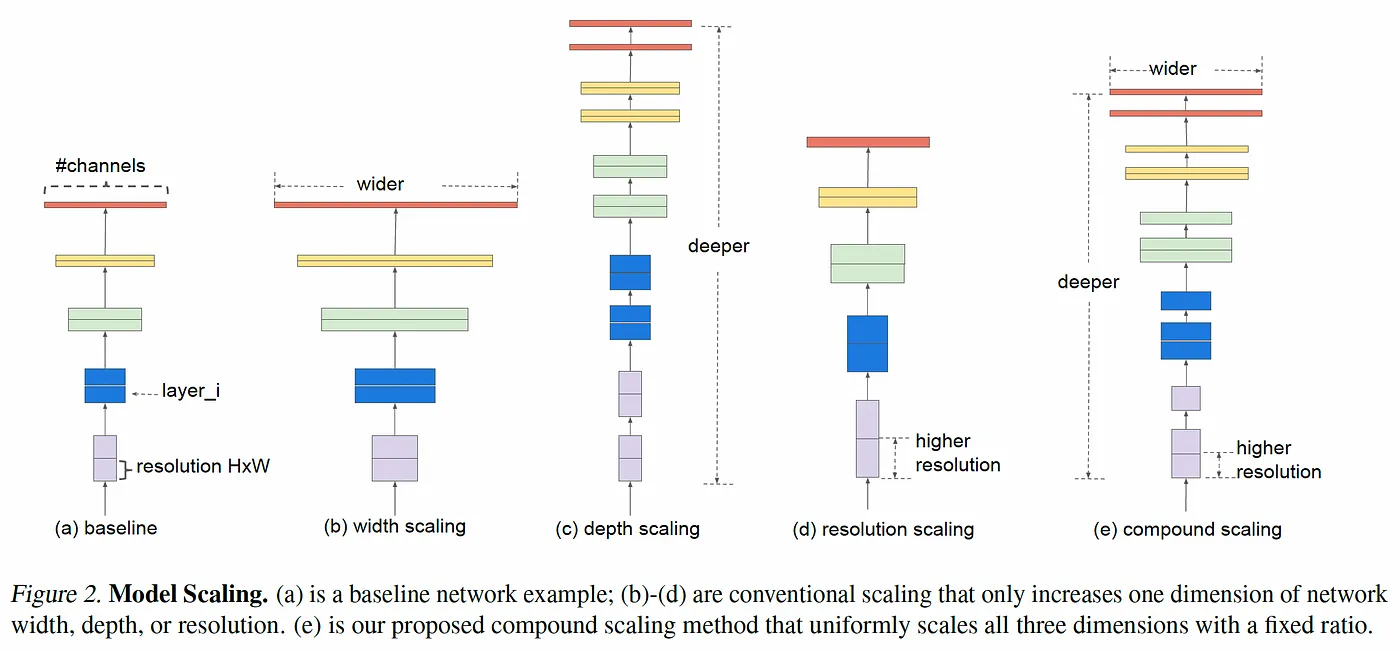
논문에서 3가지 요소를 모두 스케일링 한다는 그림 (e)를 쓴다 하니 주요 요소인 depth(모델의 레이어 개수), width(이미지의 크기), resolution(하나의 레이어에 포함되어 있는 모듈의 복잡도??) 이렇게 되는 듯 하다.

## Relate work

논문은 기존 논문의 비판 요소, 그리고 논문의 제안을 3가지 파트로 요약함

1) ConvNet Accuracy : 기존의 논문 -> 더 많은 파라미터 -> 더 커진 모델 사이즈 -> 결국 도달한 Hw memory limit
-> 논문의 제안 : Accuracy를 달성하기 위해 파라미터를 무한정 늘리는건 한계가 있다.

2) ConvNet Efficiency : 효율성을 높이기 위한 -> Model Compression기법 도입 -> 막 도입하다 보니 Accuracy가 떨어짐
-> 논문의 제안 : Accuracy가 검증된 큰 모델에도 효율성을 도입할 방안이 없을까?

3) Model Scaling : ResNet는 Model의 depth를 18~200까지 조절이 가능한 방안을 사용
WdieResNet, MobileNet은 Network width(channels)를 이용해 조절하는 방법을 도입
-> 논문의 제안 : 위 모델을은 한가지 방안으로만 모델의 효율성, 정확성을 조절함 -> depth, width, resolution 3가지를 변수로 갖고 모델을 조절하여 효율성&정확성을 잡아야 

## 3. Compound Model Scaling

기본적으로 알아두어야 할 수식
$$
\mathcal{N} = \bigodot_{i=1 \ldots s} \mathcal{F}_{i}^{L_{i}} \left( X_{\left( H_{i}, W_{i}, C_{i} \right)} \right)
$$

논문에 나온 이 수식의 주요 파라미터를 알아보자
$$
Y_i = \mathcal{F}_i(X_i)
$$

\begin{align*}
Y_i & = \text{output tensor} \\
\mathcal{F}_i & = \text{operator} \\
X_i & = \text{input tensor, shape } \langle H_i, W_i, C_i \rangle \\
H_i, W_i & = \text{spatial dimension} \\
C_i & = \text{channel dimension}
\end{align*}

우선 가장 기본이 되는 공식은 $Y_i = \mathcal{F}_i(X_i)$ 이다. 여기서 $X_i$는 input tensor로 3가지 값 $H_i, W_i, C_i$를 갖는다.

그러면 맨 첫번째 공식 $\mathcal{N} = \bigodot_{i=1 \ldots s} \mathcal{F}_{i}^{L_{i}} \left( X_{\left( H_{i}, W_{i}, C_{i} \right)} \right)$ 을 해석하자면

하나의 레이어를 통과하는 수식은 $Y_i = \mathcal{F}_i(X_i)$로 표현하는데 딥러닝 모델은 이 레이어가 여러개이니 

$$
f_5 \circ f_4 \circ f_3 \circ f_2 \circ f_1 (x)
$$
이렇게 표현이 된다. 
이 레이어가 $s$개 있다고 가정하면 첫번째 공식처럼 축약해서 쓸 수 있는것이다.


대부분의 ConvNet => 가장 Best하는 구조를 갖는 $\mathcal{F}_i$를 찾지 않음
그냥 적당한 $\mathcal{F}_i$에 $\langle H_i, W_i, C_i \rangle$를 확장시키는 방법을 더 많이 씀
</br>이렇게 써도 **Accuracy**는 잘 오르게 됨

-> 이 말을 수식화

$$
\begin{aligned}
&\max_{d, w, r} \quad \text{Accuracy}(\mathcal{N}(d, w, r)) \\
&\text{s.t.} \quad \mathcal{N}(d, w, r) = \bigodot_{i=1 \ldots s} \mathcal{\hat{F}}_{i}^{d \cdot \hat{L}_{i}} \left( X_{\left< r \cdot \hat{H}_{i}, r \cdot \hat{W}_{i}, w \cdot \hat{C}_{i} \right>} \right) \\
&\text{Memory}(\mathcal{N}) \leq \text{target\_memory} \\
&\text{FLOPS}(\mathcal{N}) \leq \text{target\_flops}
\end{aligned}
$$

논문의 제안 : 논문도 Best하는 구조를 갖는 $\mathcal{F}_i$를 찾는거는 관심이 없고
$\mathcal{N}(d, w, r)$에서 주어진 3가지 인자 </br>depth($d$), width($w$), resolution($r$)의 관계성을 도출하고
이를 통해 적절한 값으로 Accuracy를 높이는 것을 목적으로 함

### 위 3가지 인자를 Scalling하면서 발생하는 각각의 장단점을 정리
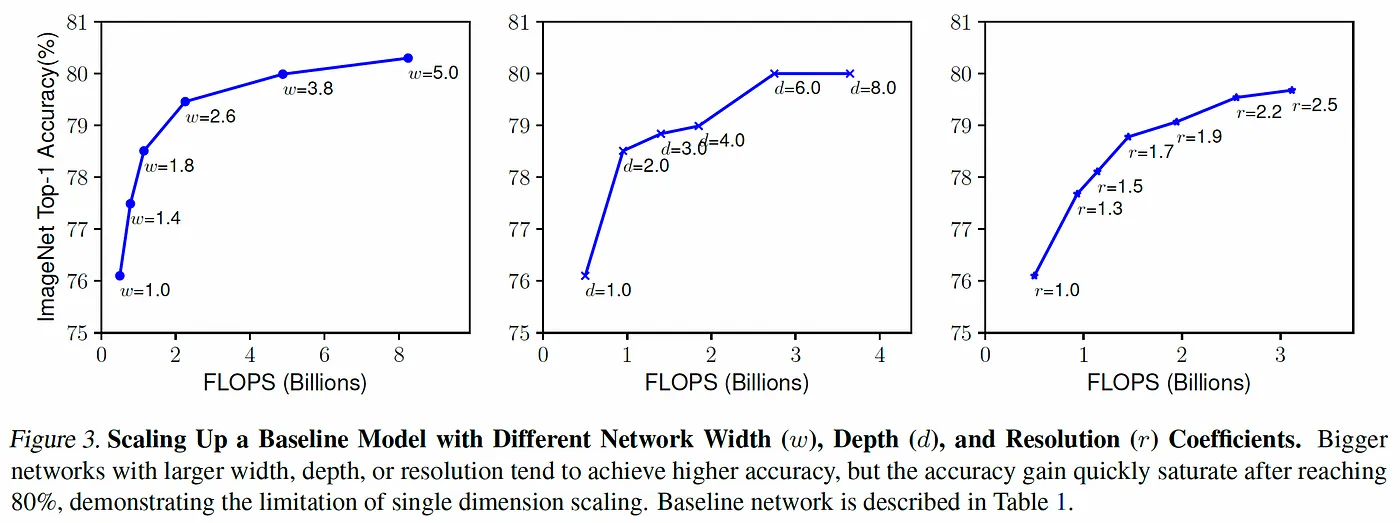

#### Width(w)
- **width**를 조절하는 것은 주로 작은 모델에서 사용
- **wider network**는 학습 과정에서 세밀한 특징을 잘 잡아내는 경향이 있음
- 하지만 극단적으로 넓지만 얕은 모델은 더 높은 수준의 특징을 포착하기 어려움
- **Figure 3**의 제일 왼쪽 그래프를 보면 **width**가 **3.8**에서 **5.0**으로 증가했음에도 **accuracy**는 큰 차이 없는 것을 볼 수 있음

#### Depth(d)
- **ConvNet**에서 가장 일반적으로 사용하는 scaling
- 깊은 모델에서는 **vanishing gradient** 문제로 학습 어려움
- **skip connection**, **batch normalization** 방법이 해결책이 될 수 있지만 매우 깊은 모델에서는 효과 없음
  - (ex. **ResNet-1000**은 **ResNet-101**보다 훨씬 많은 layer를 가지고 있지만 비슷한 **accuracy**를 가짐)
- **Figure 3**의 가운데 그래프를 보면 **depth=8**의 경우 **accuracy**가 오히려 떨어지는 것을 볼 수 있음

#### Resolution(r)
- 고해상도 이미지일수록 세밀한 패턴을 잘 잡아냄
- 초기에는 **224*224**를 사용했지만 최근에는 **600*600**을 사용하는 모델도 있음
- **Figure 3**의 제일 오른쪽 그래프를 보면 **width**와 비슷하게 어느순간부터는 **accuracy**의 큰 상승 없이 **FLOPS**만 늘어나는 것을 볼 수 있음

<div style="display: flex; align-items: flex-start;">
    <div style="flex: 1;">
        <img src="./img/04.webp" alt="image2" style="max-width: 100%; height: auto;">
    </div>
    <div style="flex: 1; padding-left: 10px;">
        경험적으로 w, d, r은 독립적이지 않다는 것을 알지만, </br>최적의 값을 찾는데는 소요되는 시간이 큼 </br>그래도 옆의 그림처럼 어케어케 실험해서 w,d,r의 상관관계를 좀 알아냄</br>
        <img src="./img/05.png" alt="image3" style="max-width: 90%; height: auto;">
    </div>
</div>

위 수식에서 $\phi$는 사용자가 임의로 지정하는 파라미터 -> 논문의 실험에서는 이걸 1로 고정함
</br> 그러면 $\alpha = 1.2$, $\beta = 1.1$, $\gamma = 1.15$일 때 최상이었음

$$ 1.2 * (1.1)^2 * (1.15)^2 = 1.92 $$



### EfficientNet Architecture
EfficientNet는 기본이 되는 레이어인  $\mathcal{F}_i$를 교체하지는 않지만 너무 개판인  $\mathcal{F}_i$를 쓰는건 선넘는 거라서
적당히 쓸만한  $\mathcal{F}_i$에 속하는 레이어를 추려냄 -> 이게 Mnas-Net의 모듈에서 찾아서 긁어옴

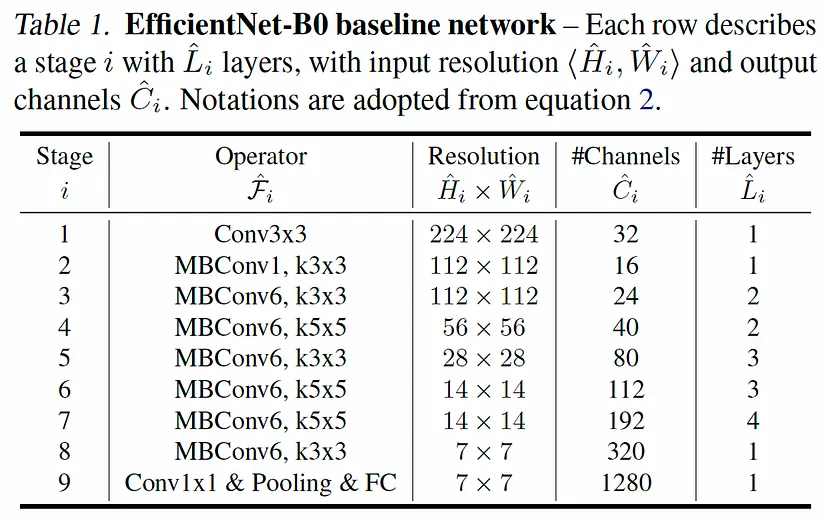


아무튼 위 기본 블럭을 바탕으로 잘 조정한 네트워크 B0~7까지 만들어보고 각 네트워크별 성능지표를 계산함
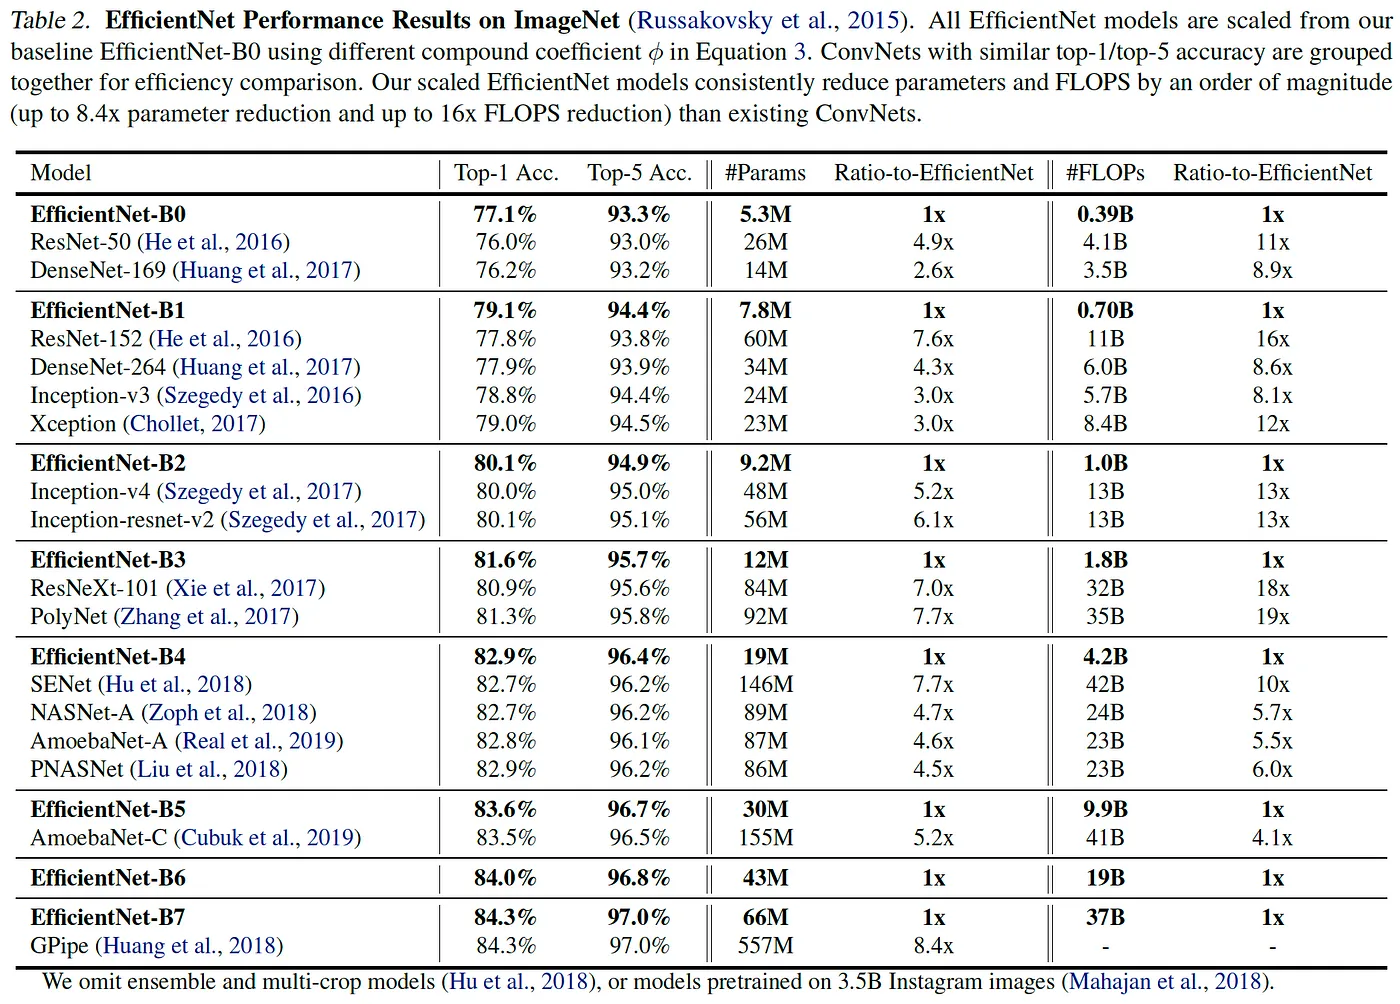

## 논문을 리뷰하면서 알아야 할 지식
기본블록에 해당하는 MBConv block -> MobileNet v2에 쓰인 기본블록
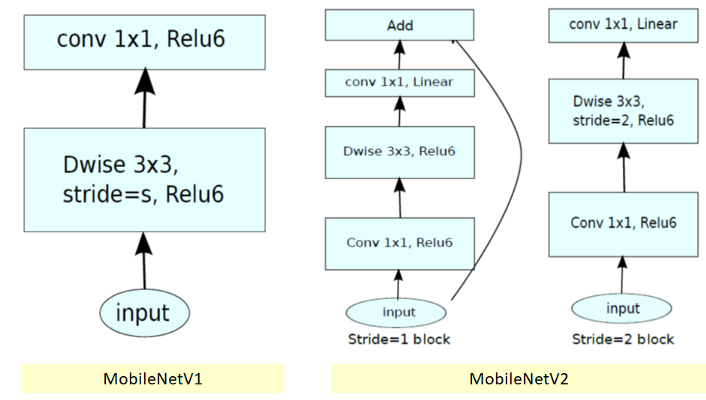

Efficientnet는 이 MBConv block를 살짝 변형함
1) Activation Function은 SiLU를 사용
2) Depth-wise ~ Point-wise 사이에 SE(Squeeze and Excitation)를 도입 -> 그냥 SE Block를 넣었다 생각하자..
3) Depth-wise 수행에 사용하는 Kernel Size 는 5임


## 코드 구현 실습
https://zrr.kr/FxD2 여기에 있는 논문 리뷰 & 코드실습을 기반으로 따라함

In [1]:
# import
import math
import torch
import torch.nn as nn
import torch.nn.functional as F

import os
from torchsummary import summary
from torch import optim
import torchvision
from torchvision.ops import StochasticDepth
import torchvision.transforms as transforms

논문에서 MBConv Block만드는데 SE과정이 포함됨 -> 이거는 SE block 포함하는거랑 똑같음

In [2]:
def _make_divisible(v, divisor, min_value = None):
    """
    This func is taken from the original tensorflow repo.
    In ensures that all layers have a channel number that is divisibale by 8
    It can be seen here:
    https://github.com/tensorflow/models/blob/master/research/slim/nets/mobilenet/mobilenet.py
    """
    if min_value is None:
        min_value = divisor
    new_v = max(min_value, int(v + divisor / 2) // divisor * divisor)
    # Make sure that round down does not go down by more than 10%.
    if new_v < 0.9 * v:
        new_v += divisor
    return int(new_v)

In [3]:
class SE_Block(nn.Module):
    def __init__(self, in_channels, squeeze_channels):
        super().__init__()

        self.squeeze = nn.AdaptiveAvgPool2d((1, 1))
        self.excitation = nn.Sequential(
            nn.Linear(in_channels, squeeze_channels),
            nn.SiLU(inplace = True),
            nn.Linear(squeeze_channels, in_channels),
            nn.Sigmoid()
        )

    def forward(self, x):
        se = self.squeeze(x)
        se = torch.flatten(se, 1)
        se = self.excitation(se)
        se = se.unsqueeze(dim = 2).unsqueeze(dim = 3)
        out = se * x
        return out

다음으로 MBCblock 설계

In [4]:
class MBConv(nn.Module):
    def __init__(self, kernel_size, in_channels, exp_channels, out_channels, stride, sd_prob):
        super().__init__()

        self.use_skip_connection = (stride == 1 and in_channels == out_channels)
        self.stochastic = StochasticDepth(sd_prob, mode = "row")
        
        expand = nn.Sequential(
            nn.Conv2d(in_channels, exp_channels, 1, bias = False),
            nn.BatchNorm2d(exp_channels, momentum = 0.99),
            nn.SiLU(inplace = True),
        )

        depthwise = nn.Sequential(
            nn.Conv2d(exp_channels, exp_channels, kernel_size, stride, padding = (kernel_size - 1) // 2, groups = exp_channels, bias = False),
            nn.BatchNorm2d(exp_channels, momentum = 0.99),
            nn.SiLU(inplace = True),
        )

        squeeze_channels = in_channels // 4     # reduction_ratio = 4
        se_block = SE_Block(exp_channels, squeeze_channels)

        pointwise = nn.Sequential(
            nn.Conv2d(exp_channels, out_channels, 1, bias = False),
            nn.BatchNorm2d(out_channels, momentum = 0.99),
            # No Activation
        )

        layers = []
        if in_channels < exp_channels:
            layers += [expand]
        layers += [depthwise, se_block, pointwise]

        self.residual = nn.Sequential(*layers)
    
    def forward(self, x):
        if self.use_skip_connection:
            residual = self.residual(x)
            residual = self.stochastic(residual)
            return residual + x
        else:
            return self.residual(x)

다음으로 위 MBCblock기반으로 EfficientNet 기본 구조 만듬(W, D, R받아서 모델별 차이가 발생하게 설계)

In [5]:
class EfficientNet(nn.Module):
    def __init__(self, num_classes, depth_mult, width_mult, resize_size, crop_size, drop_p, stochastic_depth_p = 0.2):
        super().__init__()

        cfgs = [
           #[k, t,  c, n, s]
            [3, 1, 16, 1, 1],
            [3, 6, 24, 2, 2],
            [5, 6, 40, 2, 2],
            [3, 6, 80, 3, 2],
            [5, 6, 112, 3, 1],
            [5, 6, 192, 4, 2],
            [3, 6, 320, 1, 1],
        ]

        self.transforms = transforms.Compose(
            [
                transforms.Resize(resize_size, interpolation = transforms.InterpolationMode.BICUBIC),
                transforms.CenterCrop(crop_size),
                transforms.ToTensor(),
                transforms.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225]),
            ]
        )

        in_channels = _make_divisible(32 * width_mult, 8)

        # First layer
        self.first_conv = nn.Sequential(
            nn.Conv2d(3, in_channels, 3, stride = 2, padding = 1, bias = False),
            nn.BatchNorm2d(in_channels, momentum = 0.99),
            nn.SiLU(inplace = True)
        )

        # Inverted Residual Blocks
        layers = []
        num_block = 0
        num_total_layers = sum(math.ceil(cfg[-2] * depth_mult) for cfg in cfgs)
        for kernel_size, t, c, n, s in cfgs:
            n = math.ceil(n * depth_mult)
            for i in range(n):
                stride = s if i == 0 else 1
                exp_channels = _make_divisible(in_channels * t, 8)
                out_channels = _make_divisible(c * width_mult, 8)
                sd_prob = stochastic_depth_p * (num_block / (num_total_layers - 1))

                layers.append(MBConv(kernel_size, in_channels, exp_channels, out_channels, stride, sd_prob))
                in_channels = out_channels
                num_block += 1

        self.layers = nn.Sequential(*layers)

        # Last several layers
        last_channels = _make_divisible(1280 * width_mult, 8)
        self.last_conv = nn.Sequential(
            nn.Conv2d(in_channels, last_channels, 1, bias = False),
            nn.BatchNorm2d(last_channels, momentum = 0.99),
            nn.SiLU(inplace = True)
        )
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Sequential(
            nn.Dropout(p = drop_p),
            nn.Linear(last_channels, num_classes),
        )
        
    
    def forward(self, x):
        x = self.first_conv(x)
        x = self.layers(x)
        x = self.last_conv(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

이제 논문에 나와있는 EfficeintNet 0~7을 만듬

In [6]:
def efficientnet_b0(num_classes=1000, **kwargs):
    return EfficientNet(num_classes=num_classes, depth_mult=1.0, width_mult=1.0, resize_size=256, crop_size=224, drop_p=0.2, **kwargs)

def efficientnet_b1(num_classes=1000, **kwargs):
    return EfficientNet(num_classes=num_classes, depth_mult=1.1, width_mult=1.0, resize_size=256, crop_size=240, drop_p=0.2, **kwargs)

def efficientnet_b2(num_classes=1000, **kwargs):
    return EfficientNet(num_classes=num_classes, depth_mult=1.2, width_mult=1.1, resize_size=288, crop_size=288, drop_p=0.3, **kwargs)

def efficientnet_b3(num_classes=1000, **kwargs):
    return EfficientNet(num_classes=num_classes, depth_mult=1.4, width_mult=1.2, resize_size=320, crop_size=300, drop_p=0.3, **kwargs)

def efficientnet_b4(num_classes=1000, **kwargs):
    return EfficientNet(num_classes=num_classes, depth_mult=1.8, width_mult=1.4, resize_size=384, crop_size=380, drop_p=0.4, **kwargs)

def efficientnet_b5(num_classes=1000, **kwargs):
    return EfficientNet(num_classes=num_classes, depth_mult=2.2, width_mult=1.6, resize_size=456, crop_size=456, drop_p=0.4, **kwargs)

def efficientnet_b6(num_classes=1000, **kwargs):
    return EfficientNet(num_classes=num_classes, depth_mult=2.6, width_mult=1.8, resize_size=528, crop_size=528, drop_p=0.5, **kwargs)

def efficientnet_b7(num_classes=1000, **kwargs):
    return EfficientNet(num_classes=num_classes, depth_mult=3.1, width_mult=2.0, resize_size=600, crop_size=600, drop_p=0.5, **kwargs)

B5를 가지고 모델이 잘 만들어지는지 검증해봐자



In [7]:
debug_model = efficientnet_b5()
summary(debug_model, input_size=(3,456,456), device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 48, 228, 228]           1,296
       BatchNorm2d-2         [-1, 48, 228, 228]              96
              SiLU-3         [-1, 48, 228, 228]               0
            Conv2d-4         [-1, 48, 228, 228]             432
       BatchNorm2d-5         [-1, 48, 228, 228]              96
              SiLU-6         [-1, 48, 228, 228]               0
 AdaptiveAvgPool2d-7             [-1, 48, 1, 1]               0
            Linear-8                   [-1, 12]             588
              SiLU-9                   [-1, 12]               0
           Linear-10                   [-1, 48]             624
          Sigmoid-11                   [-1, 48]               0
         SE_Block-12         [-1, 48, 228, 228]               0
           Conv2d-13         [-1, 24, 228, 228]           1,152
      BatchNorm2d-14         [-1, 24, 2

#데이터셋 가져오기 -> 블로그에서 CIFAR10을 썻음

In [8]:
import torchvision #예제 이미지 데이터셋이 모여있는 모듈
from torchvision import datasets, transforms

train_raw_data = datasets.CIFAR10("rawdata", 
                                   train=True,
                                   download=True, 
                                   transform=transforms.ToTensor())
test_raw_data = datasets.CIFAR10("rawdata", 
                                   train=False,
                                   download=True, 
                                   transform=transforms.ToTensor())

Files already downloaded and verified
Files already downloaded and verified


In [9]:
import numpy as np

#이미지 전처리11 : RGB채널별 평균/표준편차 계산 함수 설계
def normal_parm_func(input_data):

    meanRGB = [np.mean(x.numpy(), axis=(1,2)) for x, _ in input_data]
    stdRGB = [np.std(x.numpy(), axis=(1,2)) for x, _ in input_data]

    RGB_mean_list, RGB_std_list = [], []

    for i in range(3):
        RGB_mean_list.append(
            np.mean([m[i] for m in meanRGB])
        )
        RGB_std_list.append(
            np.mean([s[i] for s in stdRGB])
        )

    return RGB_mean_list, RGB_std_list


proc_train_data = normal_parm_func(train_raw_data)
proc_test_data = normal_parm_func(test_raw_data)

print(f"Train Mean: {[format(m, '.3f') for m in proc_train_data[0]]}, \
      Train Std: {[format(s, '.3f') for s in proc_train_data[1]]}")
print(f"Test Mean: {[format(m, '.3f') for m in proc_test_data[0]]}, \
      Test Std: {[format(s, '.3f') for s in proc_test_data[1]]}")


Train Mean: ['0.491', '0.482', '0.447'],       Train Std: ['0.202', '0.199', '0.201']
Test Mean: ['0.494', '0.485', '0.450'],       Test Std: ['0.202', '0.199', '0.201']


In [10]:
train_transformation = transforms.Compose([
    transforms.ToTensor(), 
    transforms.RandomResizedCrop((224, 224)), #efficientNet는 224
    transforms.RandomHorizontalFlip(), #이건 안쓰는 적이 없음
    transforms.Normalize(mean=proc_train_data[0], std=proc_train_data[1])
    
])
test_transformation = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((224, 224)), #Inception_V3 입력 이미지는 299 299 3임
    transforms.Normalize(mean=proc_train_data[0], std=proc_train_data[1])
    #훈련데이터의 평균, 표준편차 입력
])

#블로그는 데이터 증강 아에 안썻는데 그냥 반전 하나만 넣어둠..

#데이터 로더 생성 -> 여기서 Batch_size를 정의함
train_loader = torch.utils.data.DataLoader(train_raw_data, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_raw_data, batch_size=64, shuffle=False)

In [11]:
def count_images_and_labels(loader):
    num_images = 0
    label_set = set()
    for data, labels in loader:
        num_images += data.size(0)
        label_set.update(labels.tolist())
    
    return num_images, len(label_set)


train_images, train_label_count = count_images_and_labels(train_loader)
test_images, test_label_count = count_images_and_labels(test_loader)

print(f"Training Images: {train_images}, Unique Labels: {train_label_count}")
print(f"Testing Images: {test_images}, Unique Labels: {test_label_count}")

Training Images: 50000, Unique Labels: 10
Testing Images: 10000, Unique Labels: 10


In [12]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# CUDA가 사용 가능한 경우, 추가 정보 출력
if device.type == 'cuda':
    print(f"GPU Name: {torch.cuda.get_device_name(0)}")
    print(f"GPU Capability: {torch.cuda.get_device_capability(0)}")
    print(f"Total Memory: {torch.cuda.get_device_properties(0).total_memory / (1024 ** 3):.2f} GB")  # GB 단위로 변환
    print(f"Number of GPUs: {torch.cuda.device_count()}")

cuda
GPU Name: NVIDIA GeForce RTX 4090 Laptop GPU
GPU Capability: (8, 9)
Total Memory: 15.99 GB
Number of GPUs: 1


In [13]:
ex_model = efficientnet_b5(num_classes=train_label_count)
ex_model.to(device)
summary(ex_model, input_size=(3, 224, 224), device='cuda')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 48, 112, 112]           1,296
       BatchNorm2d-2         [-1, 48, 112, 112]              96
              SiLU-3         [-1, 48, 112, 112]               0
            Conv2d-4         [-1, 48, 112, 112]             432
       BatchNorm2d-5         [-1, 48, 112, 112]              96
              SiLU-6         [-1, 48, 112, 112]               0
 AdaptiveAvgPool2d-7             [-1, 48, 1, 1]               0
            Linear-8                   [-1, 12]             588
              SiLU-9                   [-1, 12]               0
           Linear-10                   [-1, 48]             624
          Sigmoid-11                   [-1, 48]               0
         SE_Block-12         [-1, 48, 112, 112]               0
           Conv2d-13         [-1, 24, 112, 112]           1,152
      BatchNorm2d-14         [-1, 24, 1

## 옵티마이저, 로스 함수 정의

In [14]:
lr = 0.01

criterion = nn.CrossEntropyLoss(reduction='sum')
optimizer = torch.optim.Adam(ex_model.parameters(), lr=lr)


## 그림 그려주는 훈련/검증 코드 사용

In [15]:
import time, copy
from torch.optim.lr_scheduler import ReduceLROnPlateau
lr_scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10)

# get current lr
def get_lr(opt):
    for param_group in opt.param_groups:
        return param_group['lr']


# calculate the metric per mini-batch
def metric_batch(output, target):
    pred = output.argmax(1, keepdim=True)
    corrects = pred.eq(target.view_as(pred)).sum().item()
    return corrects


# calculate the loss per mini-batch
def loss_batch(loss_func, output, target, opt=None):
    loss_b = loss_func(output, target)
    metric_b = metric_batch(output, target)

    if opt is not None:
        opt.zero_grad()
        loss_b.backward()
        opt.step()
    
    return loss_b.item(), metric_b


# calculate the loss per epochs
def loss_epoch(model, loss_func, dataset_dl, sanity_check=False, opt=None):
    running_loss = 0.0
    running_metric = 0.0
    len_data = len(dataset_dl.dataset)

    for xb, yb in dataset_dl:
        xb = xb.to(device)
        yb = yb.to(device)
        output = model(xb)

        loss_b, metric_b = loss_batch(loss_func, output, yb, opt)

        running_loss += loss_b
        
        if metric_b is not None:
            running_metric += metric_b

        if sanity_check is True:
            break

    loss = running_loss / len_data
    metric = running_metric / len_data
    return loss, metric


# function to start training
def train_val(model, params):
    num_epochs=params['num_epochs']
    loss_func=params['loss_func']
    opt=params['optimizer']
    train_dl=params['train_dl']
    val_dl=params['val_dl']
    sanity_check=params['sanity_check']
    lr_scheduler=params['lr_scheduler']
    path2weights=params['path2weights']

    loss_history = {'train': [], 'val': []}
    metric_history = {'train': [], 'val': []}

    best_loss = float('inf')
    best_model_wts = copy.deepcopy(model.state_dict())
    start_time = time.time()

    for epoch in range(num_epochs):
        current_lr = get_lr(opt)
        print('Epoch {}/{}, current lr= {}'.format(epoch, num_epochs-1, current_lr))

        model.train()
        train_loss, train_metric = loss_epoch(model, loss_func, train_dl, sanity_check, opt)
        loss_history['train'].append(train_loss)
        metric_history['train'].append(train_metric)

        model.eval()
        with torch.no_grad():
            val_loss, val_metric = loss_epoch(model, loss_func, val_dl, sanity_check)
        loss_history['val'].append(val_loss)
        metric_history['val'].append(val_metric)

        if val_loss < best_loss:
            best_loss = val_loss
            best_model_wts = copy.deepcopy(model.state_dict())
            torch.save(model.state_dict(), path2weights)
            print('Copied best model weights!')

        lr_scheduler.step(val_loss)
        if current_lr != get_lr(opt):
            print('Loading best model weights!')
            model.load_state_dict(best_model_wts)

        print('train loss: %.6f, val loss: %.6f, accuracy: %.2f, time: %.4f min' %(train_loss, val_loss, 100*val_metric, (time.time()-start_time)/60))
        print('-'*10)

    model.load_state_dict(best_model_wts)
    return model, loss_history, metric_history

In [16]:
# define the training parameters
params_train = {
    'num_epochs':100,
    'optimizer':optimizer,
    'loss_func':criterion,
    'train_dl':train_loader,
    'val_dl':test_loader,
    'sanity_check':False,
    'lr_scheduler':lr_scheduler,
    'path2weights':'./models/weights.pt',
}

# check the directory to save weights.pt
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print('Error')
createFolder('./models')

In [17]:
odel, loss_hist, metric_hist = train_val(ex_model, params_train)

Epoch 0/99, current lr= 0.01
Copied best model weights!
train loss: 3.048776, val loss: 11167939.398800, accuracy: 7.89, time: 1.6152 min
----------
Epoch 1/99, current lr= 0.01
Copied best model weights!
train loss: 2.510306, val loss: 2.393211, accuracy: 12.72, time: 3.0538 min
----------
Epoch 2/99, current lr= 0.01
train loss: 2.350977, val loss: 9977.610803, accuracy: 12.35, time: 4.5384 min
----------
Epoch 3/99, current lr= 0.01
train loss: 2.296892, val loss: 29641.989082, accuracy: 14.08, time: 5.8967 min
----------
Epoch 4/99, current lr= 0.01
train loss: 2.231289, val loss: 139.525620, accuracy: 10.06, time: 7.3906 min
----------
Epoch 5/99, current lr= 0.01
train loss: 2.333054, val loss: 22556.248094, accuracy: 10.92, time: 8.9777 min
----------
Epoch 6/99, current lr= 0.01
train loss: 2.329450, val loss: 48460.527352, accuracy: 10.72, time: 10.4903 min
----------
Epoch 7/99, current lr= 0.01
train loss: 2.354384, val loss: 1523.983393, accuracy: 10.31, time: 11.8725 min
-

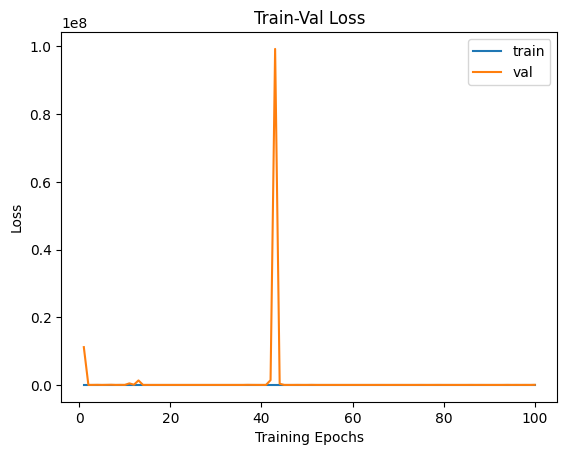

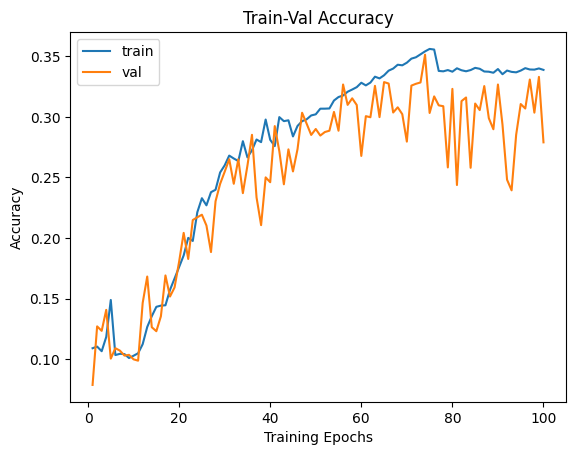

In [18]:
import matplotlib.pyplot as plt

num_epochs = params_train['num_epochs']

# Plot train-val loss
plt.title('Train-Val Loss')
plt.plot(range(1, num_epochs+1), loss_hist['train'], label='train')
plt.plot(range(1, num_epochs+1), loss_hist['val'], label='val')
plt.ylabel('Loss')
plt.xlabel('Training Epochs')
plt.legend()
plt.show()

# plot train-val accuracy
plt.title('Train-Val Accuracy')
plt.plot(range(1, num_epochs+1), metric_hist['train'], label='train')
plt.plot(range(1, num_epochs+1), metric_hist['val'], label='val')
plt.ylabel('Accuracy')
plt.xlabel('Training Epochs')
plt.legend()
plt.show()